In [1]:
#Подгружаем библиотеки pandas и numpy
import numpy as np
import pandas as pd

# Новые библиотеки
# Подгружаем библиотеки matplotlib и Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

















In [2]:
df = pd.read_csv("data/data_kr_kz.csv")

C:\Users\anarb\AppData\Local\Temp\ipykernel_19808\959933134.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data_kr_kz.csv")


## Dealing with Missing Values

In [3]:
df

,city,region,area,residental_complex,condition,views,phone_views,builder,latitude,longitude,price,rooms_amount,year,floor1,floor2,type_of_building,ceiling_height,date_of_publication
0,Нур-Султан (Астана),Есиль р-н,108.0,Promenade Expo,евроремонт,1.0,0.0,NaN,51.094539,71.427294,45000000,3,2017,6.0,7.0,монолитный,NaN,2020-08-04
1,Нур-Султан (Астана),р-н Байконур,59.0,Жар-Жар,евроремонт,1332.0,35.0,NaN,51.161597,71.457827,17300000,2,2011,13.0,15.0,кирпичный,2.70,2020-09-08
2,Алматы,Алмалинский р-н,73.0,NaN,хорошее,1.0,0.0,NaN,43.257211,76.933419,36000000,3,1980,2.0,5.0,кирпичный,NaN,2020-06-19
3,Нур-Султан (Астана),Сарыарка р-н,287.0,Европейский,черновая отделка,22.0,0.0,NaN,NaN,NaN,38000000,6,2010,18.0,19.0,монолитный,2.70,2020-05-14
4,Нур-Султан (Астана),Есиль р-н,97.2,Park Avenue Exclusive,NaN,10.0,0.0,NaN,51.100628,71.425331,62000000,3,2018,13.0,14.0,монолитный,3.00,2020-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810403,Алматы,Бостандыкский р-н,60.0,NaN,евроремонт,10.0,0.0,NaN,43.210104,76.899058,38000000,2,2020,7.0,10.0,монолитный,2.85,2021-02-08
810404,Алматы,Ауэзовский р-н,100.0,Тау Самал на Навои,евроремонт,13.0,2.0,NaN,43.216740,76.884065,41000000,2,2007,9.0,14.0,монолитный,NaN,2021-02-08
810405,Алматы,Бостандыкский р-н,135.0,AFD PLAZA,евроремонт,30.0,0.0,NaN,43.229100,76.942900,95000000,3,2015,12.0,21.0,монолитный,NaN,2021-02-08
810406,Алматы,Бостандыкский р-н,126.0,КУАТ на Торайгырова - Саина,евроремонт,5.0,0.0,NaN,43.201965,76.872822,62900000,3,2006,6.0,14.0,монолитный,NaN,2021-02-08


In [4]:
df.drop("builder", axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810408 entries, 0 to 810407
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city                 810408 non-null  object 
 1   region               780531 non-null  object 
 2   area                 810391 non-null  float64
 3   residental_complex   331945 non-null  object 
 4   condition            683614 non-null  object 
 5   views                808266 non-null  float64
 6   phone_views          808266 non-null  float64
 7   latitude             785598 non-null  float64
 8   longitude            785598 non-null  float64
 9   price                810408 non-null  int64  
 10  rooms_amount         810408 non-null  int64  
 11  year                 810405 non-null  object 
 12  floor1               789759 non-null  float64
 13  floor2               781120 non-null  float64
 14  type_of_building     732118 non-null  object 
 15  ceiling_height   

In [6]:
df.city.unique()

array(['Нур-Султан (Астана)', 'Алматы', 'Шымкент', 'Казахстан', 'Актобе',
       'Талдыкорган', 'Астана', 'Петропавловск', 'Каскелен', 'Темиртау'],
      dtype=object)

In [7]:
astana_city = ['Нур-Султан (Астана)', 'Астана']

In [8]:
df = df[df.city.isin(astana_city)]

In [9]:
missing_residence_indexes = df[df.residental_complex.isnull()].index
df.drop(missing_residence_indexes, inplace=True)

C:\Users\anarb\AppData\Local\Temp\ipykernel_19808\1927874094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(missing_residence_indexes, inplace=True)


In [10]:
df_zhk_height = df.groupby("residental_complex")['ceiling_height'].first().reset_index()
df_zhk_height = df_zhk_height.rename(columns={'ceiling_height':'potolok_height'})

In [11]:
df = df.merge(df_zhk_height)

In [12]:
df.drop('ceiling_height', axis=1, inplace=True)

In [13]:
null_sum = df.isnull().sum().sort_values(ascending = False)
null_percent = round(df.isnull().sum().sort_values(ascending = False) / df.shape[0], 2)
pd.concat([null_sum, null_percent], axis=1)

,0,1
condition,56761,0.29
type_of_building,43797,0.22
floor2,15524,0.08
region,12301,0.06
floor1,11506,0.06
longitude,9403,0.05
latitude,9403,0.05
views,631,0.00
phone_views,631,0.00
potolok_height,106,0.00


## Univariate Analysis

In [14]:
quatile_99 = df.price.quantile(0.99)
df = df[df.price < quatile_99]

In [15]:
quatile_1 = df.price.quantile(0.01)
df = df[df.price > quatile_1]

In [16]:
df[['price']].describe()

,price
count,1.917350e+05
mean,2.725677e+07
std,1.608518e+07
min,8.510000e+06
25%,1.630000e+07
50%,2.280000e+07
75%,3.250000e+07
max,1.172413e+08


<AxesSubplot: >

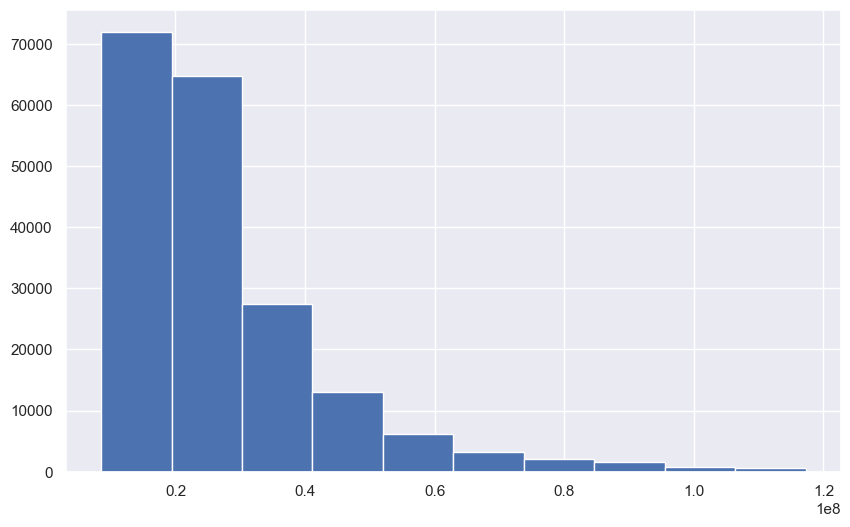

In [17]:
df['price'].hist(figsize=(10, 6))

In [18]:
# sns.boxplot(x='price', data=df);

## Bivariate Analysis

In [19]:
numerical = df.describe().columns
numerical = list(
    set(numerical)
    - set(
        [
            "latitude",
            "longitude",
        ]
    )
)

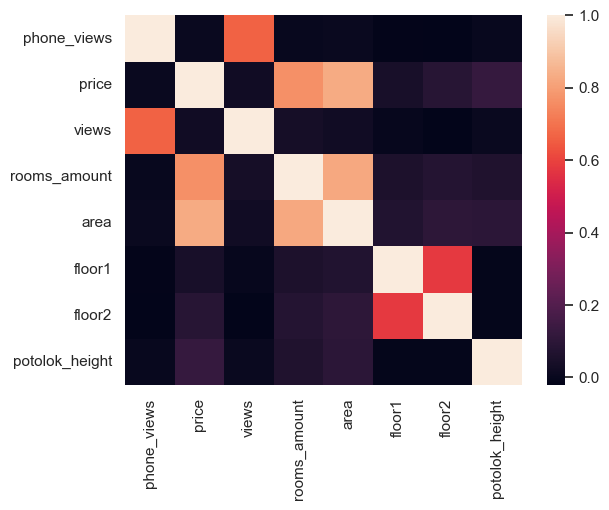

In [20]:
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [21]:
corr_matrix

,phone_views,price,views,rooms_amount,area,floor1,floor2,potolok_height
phone_views,1.000000,0.006369,0.664998,0.002681,0.003935,-0.013219,-0.017433,0.000335
price,0.006369,1.000000,0.024464,0.765897,0.830640,0.043251,0.085937,0.126597
views,0.664998,0.024464,1.000000,0.035603,0.023621,-0.001452,-0.020920,0.005704
rooms_amount,0.002681,0.765897,0.035603,1.000000,0.823281,0.057038,0.076062,0.064879
area,0.003935,0.830640,0.023621,0.823281,1.000000,0.067527,0.101534,0.094940
floor1,-0.013219,0.043251,-0.001452,0.057038,0.067527,1.000000,0.579829,-0.011680
floor2,-0.017433,0.085937,-0.020920,0.076062,0.101534,0.579829,1.000000,-0.010784
potolok_height,0.000335,0.126597,0.005704,0.064879,0.094940,-0.011680,-0.010784,1.000000


In [22]:
df = df[df.area < 300]

In [23]:
from sklearn.utils import shuffle
df = shuffle(df)
saple_size = round(df.shape[0]*0.10)
df = df[:saple_size]

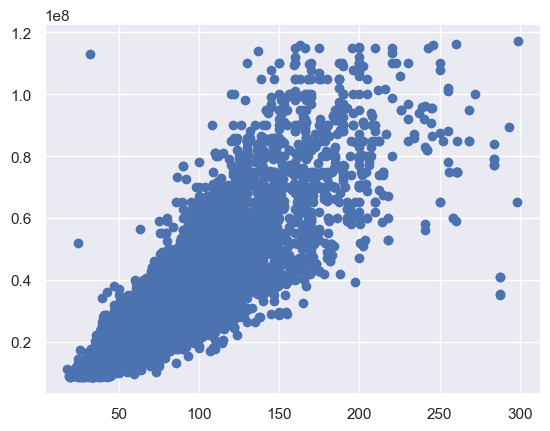

In [24]:
plt.scatter(df["area"], df["price"]);

In [25]:
df.region.unique()

array(['Сарыарка р-н', 'р-н Байконур', 'Есиль р-н', 'Алматы р-н', nan],
      dtype=object)

<AxesSubplot: xlabel='region', ylabel='price'>

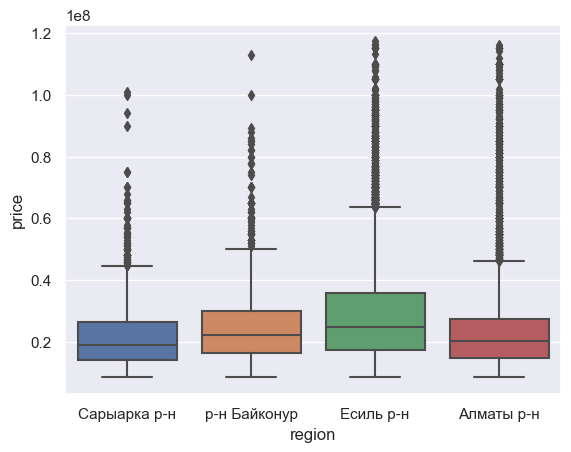

In [26]:
sns.boxplot(x='region', y = 'price', data=df)

В есиле более дорогие квартиры чем в других районах 

In [27]:
df.head()

,city,region,area,residental_complex,condition,views,phone_views,latitude,longitude,price,rooms_amount,year,floor1,floor2,type_of_building,date_of_publication,potolok_height
183301,Нур-Султан (Астана),Сарыарка р-н,43.00,По Тлендиева,хорошее,22.0,1.0,51.190688,71.340095,11900000,1,2012,4.0,14.0,кирпичный,2020-06-01,2.7
127706,Нур-Султан (Астана),р-н Байконур,58.00,Сатты,хорошее,528.0,26.0,51.168396,71.437391,26500000,2,2010,2.0,9.0,кирпичный,2020-09-28,2.8
124444,Нур-Султан (Астана),Есиль р-н,42.00,Aitys,черновая отделка,6.0,0.0,51.100494,71.413398,20500000,1,2016,3.0,15.0,монолитный,2021-01-22,2.7
43649,Нур-Султан (Астана),Есиль р-н,36.84,College,NaN,566.0,10.0,51.145469,71.375076,9944100,1,2020.0,NaN,NaN,кирпичный,2020-05-17,3.0
55002,Нур-Султан (Астана),Есиль р-н,48.00,Only Sun,черновая отделка,352.0,9.0,51.089272,71.425866,18000000,2,2020,21.0,22.0,монолитный,2020-09-30,3.0


In [28]:
df = df.rename(columns={'floor1' : 'current_floor', 'floor2' : 'max_floor'})

In [29]:
df2 = pd.read_csv('data/family_Zhk_Developer_Class.csv')
df2

,Unnamed: 0,ObjectName,family_zhk,developer,Class
0,12,7Я,7Я,BI,комфорт
1,13,Absolute,Absolute,ИК Каражат,Бизнес
2,14,Adal,ADAL,BI,комфорт
3,15,ADAL-2,ADAL,BI,Комфорт
4,16,ADAL-3,ADAL,BI,Комфорт
...,...,...,...,...,...
227,714,SezimQala-8(Монолит),Sezim Qala,Nova City,стандарт
228,715,SezimQala-6-1(КПД),Sezim Qala,Nova City,стандарт
229,716,NovaCityнаТуране-2-2(Монолит),Nova City на Туране,Nova City,стандарт
230,717,NovaCityнаТуране-2-1(Монолит),Nova City на Туране,Nova City,стандарт


date_of_publication - дата публикация объявления 

1. В зависимости от condition какая стоимость у квартир?
2. В зависимости от высоты потолка какая стоимость у квартир?
3. В зависимости от года постройки какие состояния у квартир и их цены?
4. Типы здания в зависимости от района?
5. В зависимости от этажей какие цены на квартиры?
6. В зависимости от этажей какие квартиры более привлекательные? (views и phone_views, date_of_publication)
7. По районам более дешевые квартиры набирают больше views и phone_views, болшее дорогиее менее привлекательные
8. date_of_publication в какое время года дороже, а когда дешевле?
9. У BI дорогие квартиры? В зависимости от класса как меняется?
10. По очередям меняется ли цена у квартир?

1. В зависимости от condition какая стоимость у квартир?
Ответ: Квартиры с евроремонтом и свободной планировкой имеют высокую цену чем остальные.

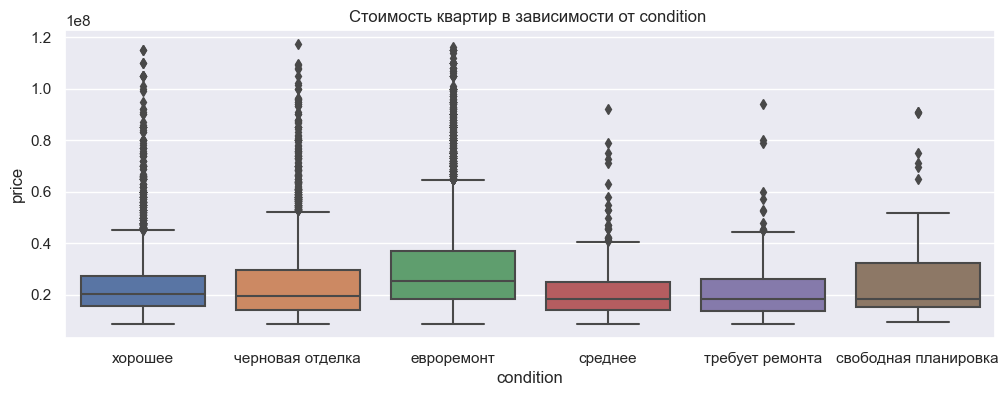

In [30]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='condition', y = 'price', data=df)
plt.title('Cтоимость квартир в зависимости от condition ')
plt.show()

2. В зависимости от высоты потолка какая стоимость у квартир?

In [31]:
df.groupby('potolok_height')['price'].agg(["mean","count"])

,mean,count
potolok_height,,
2.00,1.952024e+07,37
2.20,2.094091e+07,44
2.25,1.301000e+07,5
2.40,2.416552e+07,29
2.50,1.645000e+07,4
2.60,1.809429e+07,216
2.65,1.804000e+07,10
2.69,1.590909e+07,11
2.70,2.183986e+07,6219


In [32]:
df_no_outliers = df[df["potolok_height"]<4]
df_no_outliers["potolok_height_range"]= pd.cut(df_no_outliers["potolok_height"], bins=6)

C:\Users\anarb\AppData\Local\Temp\ipykernel_19808\3225814985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["potolok_height_range"]= pd.cut(df_no_outliers["potolok_height"], bins=6)


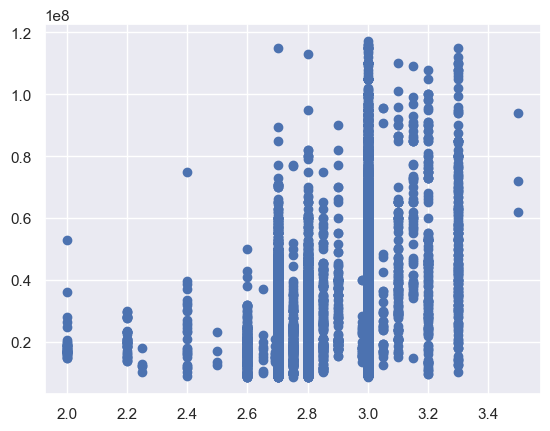

In [33]:
plt.scatter(df_no_outliers["potolok_height"], df_no_outliers["price"]);

Ответ: Если нарисовать scatter plot, то видно что цены квартир повышаются, если высота потолка тоже.
Также, если мы разделим на какие-то 6 ranges то самые высокие цены имеют квартиры с высотой потолка между 3.25м и  3.5м

In [34]:
df_no_outliers.groupby('potolok_height_range')['price'].agg(["mean","count"])

,mean,count
potolok_height_range,,
"(1.998, 2.25]",1.986859e+07,86
"(2.25, 2.5]",2.323030e+07,33
"(2.5, 2.75]",2.168317e+07,6649
"(2.75, 3.0]",2.919521e+07,11797
"(3.0, 3.25]",4.772647e+07,344
"(3.25, 3.5]",5.527791e+07,180


4. В зависимости от года постройки какие состояния у квартир и их цены?
Ответ:
Цены квартир почти всех типов состоянии очень сильно выросли с 2000 до 2005, за исключением свободной планировки.
Цены сильно выросли на квартир свободной планировкой начиная с 2012 до 2015, потом резко упали. 

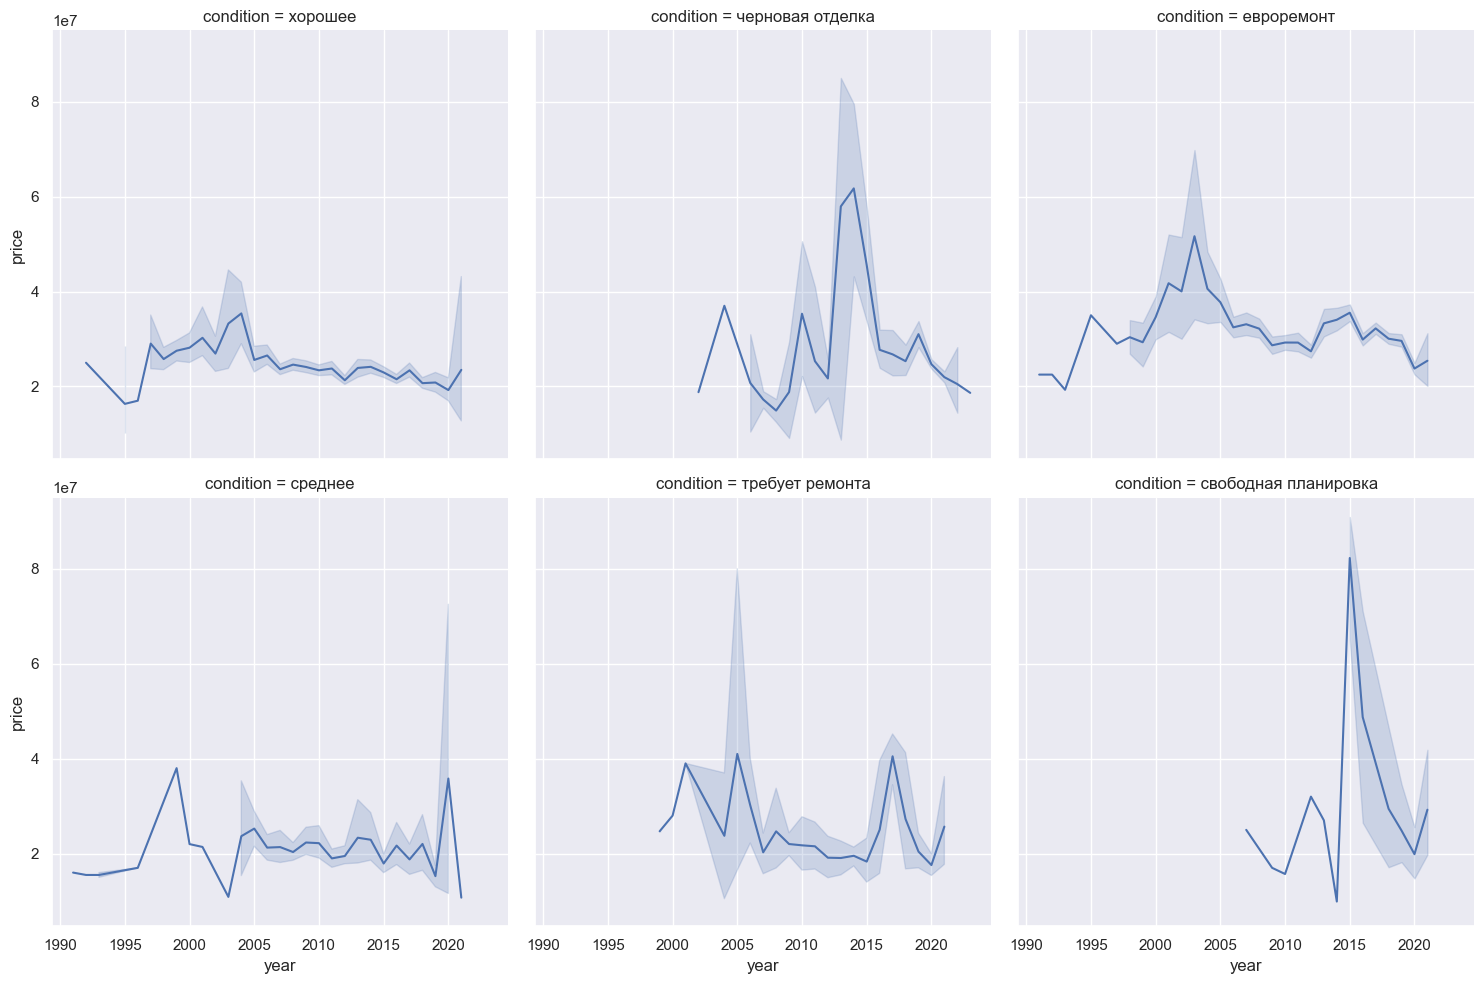

In [35]:
df['year'] = df['year'].astype('int')
sns.relplot(x='year', y='price',kind='line', col = 'condition',col_wrap=3, data=df[df['year']>1990])

5. В зависимости от этажей какие цены на квартиры?

In [36]:
df['current_floor'].describe()

count    18069.000000
mean         7.251038
std          4.723254
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        138.000000
Name: current_floor, dtype: float64

In [37]:
qu_99 = df.current_floor.quantile(0.99)
df = df[df["current_floor"]<qu_99]

<AxesSubplot: xlabel='current_floor', ylabel='price'>

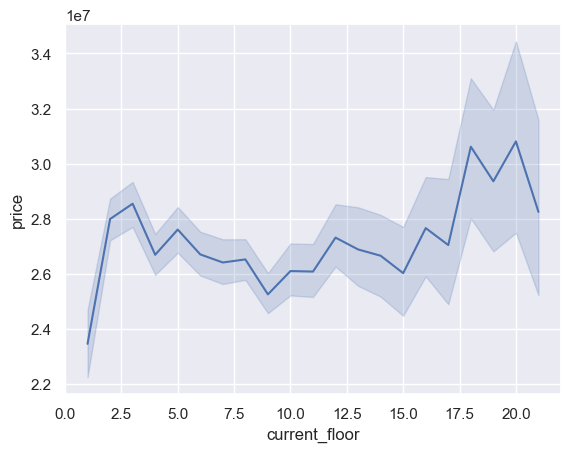

In [38]:
sns.lineplot(x='current_floor', y='price', data=df)

Особой зависимости цены квартир на этаж нету, но все таки мы замечаем, что начиная с 10 до 19 цены поднимаются

6. В зависимости от этажей какие квартиры более привлекательные? (views и phone_views, date_of_publication)

In [39]:
df.views.describe()

count    17812.000000
mean       331.381316
std        985.686249
min          0.000000
25%          4.000000
50%         30.000000
75%        252.000000
max      41936.000000
Name: views, dtype: float64

In [40]:
quartile_95 = df.views.quantile(0.90)
quartile_05 = df.views.quantile(0.05)
df_view_n_outliers = df[(df['views']<quartile_95) & (df['views']>quartile_05)]
df_view_n_outliers

,city,region,area,residental_complex,condition,views,phone_views,latitude,longitude,price,rooms_amount,year,current_floor,max_floor,type_of_building,date_of_publication,potolok_height
183301,Нур-Султан (Астана),Сарыарка р-н,43.0,По Тлендиева,хорошее,22.0,1.0,51.190688,71.340095,11900000,1,2012,4.0,14.0,кирпичный,2020-06-01,2.7
127706,Нур-Султан (Астана),р-н Байконур,58.0,Сатты,хорошее,528.0,26.0,51.168396,71.437391,26500000,2,2010,2.0,9.0,кирпичный,2020-09-28,2.8
124444,Нур-Султан (Астана),Есиль р-н,42.0,Aitys,черновая отделка,6.0,0.0,51.100494,71.413398,20500000,1,2016,3.0,15.0,монолитный,2021-01-22,2.7
55002,Нур-Султан (Астана),Есиль р-н,48.0,Only Sun,черновая отделка,352.0,9.0,51.089272,71.425866,18000000,2,2020,21.0,22.0,монолитный,2020-09-30,3.0
166122,Нур-Султан (Астана),Сарыарка р-н,34.0,Ак Тилек,хорошее,2.0,0.0,51.195343,71.323700,12800000,1,2016,10.0,10.0,кирпичный,2021-01-27,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88199,Нур-Султан (Астана),р-н Байконур,53.0,Жаркын,хорошее,46.0,0.0,51.165513,71.472854,15500000,2,2009,7.0,16.0,монолитный,2020-06-09,2.8
190497,Нур-Султан (Астана),Алматы р-н,52.0,HOLLAND,черновая отделка,714.0,22.0,51.112166,71.463371,22900000,2,2020,5.0,9.0,монолитный,2020-12-01,3.0
22696,Нур-Султан (Астана),Есиль р-н,43.3,Atlant,черновая отделка,140.0,3.0,51.135389,71.418658,20100000,1,2022,2.0,8.0,NaN,2021-02-07,3.0
32670,Нур-Султан (Астана),Есиль р-н,67.0,Самрук Towers,евроремонт,15.0,34.0,51.140883,71.387122,24000000,2,2019,4.0,16.0,кирпичный,2020-08-21,2.8


In [41]:
df_view_n_outliers.groupby(['current_floor'])['views'].agg(["mean","count"]).sort_values(by="mean",ascending = False)

,mean,count
current_floor,,
21.0,181.103448,58
20.0,168.873239,71
15.0,160.317972,217
18.0,155.625000,120
16.0,141.965812,234
13.0,141.772358,369
4.0,136.973362,1389
2.0,134.653324,1399
3.0,133.809192,1436


7. По районам более дешевые квартиры набирают больше views и phone_views, болшее дорогиее менее привлекательные

In [42]:
df_view_n_outliers = df_view_n_outliers[df_view_n_outliers["views"]<10000]
df_view_n_outliers["views_range"]= pd.cut(df_view_n_outliers["views"], bins=6)
df_view_n_outliers.views_range.value_counts()

(0.117, 148.167]      10475
(148.167, 295.333]     1474
(295.333, 442.5]        904
(442.5, 589.667]        616
(589.667, 736.833]      483
(736.833, 884.0]        342
Name: views_range, dtype: int64

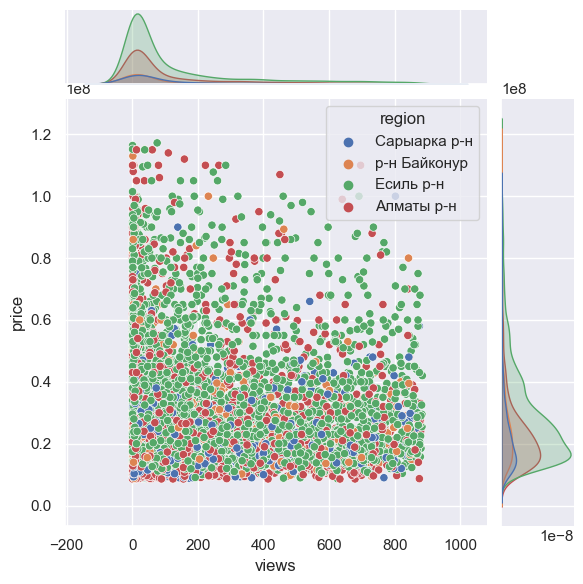

In [43]:
sns.jointplot(data=df_view_n_outliers, x="views", y="price", hue="region")

In [44]:
df_view_n_outliers.groupby("views_range")["price"].mean()

views_range
(0.117, 148.167]      2.612547e+07
(148.167, 295.333]    2.690645e+07
(295.333, 442.5]      2.739631e+07
(442.5, 589.667]      2.731860e+07
(589.667, 736.833]    2.895078e+07
(736.833, 884.0]      3.040833e+07
Name: price, dtype: float64

Ответ: такое явление я не заметила, отклоняем гипотезу

8. date_of_publication в какое время года дороже, а когда дешевле?


In [50]:
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))
month_to_season 

{1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4, 12: 1}

In [51]:
df["season"] = df.date_of_publication.dt.month.map(month_to_season) 
df.head()

C:\Users\anarb\AppData\Local\Temp\ipykernel_19808\1259225357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["season"] = df.date_of_publication.dt.month.map(month_to_season)


,city,region,area,residental_complex,condition,views,phone_views,latitude,longitude,price,rooms_amount,year,current_floor,max_floor,type_of_building,date_of_publication,potolok_height,season
183301,Нур-Султан (Астана),Сарыарка р-н,43.0,По Тлендиева,хорошее,22.0,1.0,51.190688,71.340095,11900000,1,2012,4.0,14.0,кирпичный,2020-06-01,2.7,3
127706,Нур-Султан (Астана),р-н Байконур,58.0,Сатты,хорошее,528.0,26.0,51.168396,71.437391,26500000,2,2010,2.0,9.0,кирпичный,2020-09-28,2.8,4
124444,Нур-Султан (Астана),Есиль р-н,42.0,Aitys,черновая отделка,6.0,0.0,51.100494,71.413398,20500000,1,2016,3.0,15.0,монолитный,2021-01-22,2.7,1
55002,Нур-Султан (Астана),Есиль р-н,48.0,Only Sun,черновая отделка,352.0,9.0,51.089272,71.425866,18000000,2,2020,21.0,22.0,монолитный,2020-09-30,3.0,4
166122,Нур-Султан (Астана),Сарыарка р-н,34.0,Ак Тилек,хорошее,2.0,0.0,51.195343,71.323700,12800000,1,2016,10.0,10.0,кирпичный,2021-01-27,2.8,1


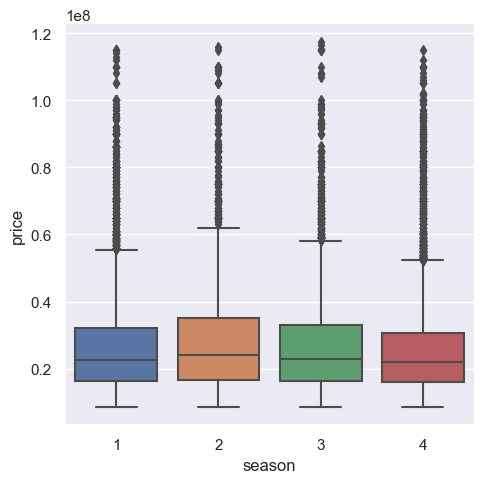

In [52]:
sns.catplot(kind = "box", y='price',x= "season", data=df)


Ответ: после того как мы нашли сезон каждой дате, и построили boxplot, можем увидеть что весной больше всего цена дороже,  а осенью чуть дешевле чем в остальных 

9. У BI дорогие квартиры? В зависимости от класса как меняется?

In [84]:
all_data = pd.merge(df, df2, how="inner", left_on="residental_complex", right_on="ObjectName" )
all_data

,city,region,area,residental_complex,condition,views,phone_views,latitude,longitude,price,...,max_floor,type_of_building,date_of_publication,potolok_height,season,Unnamed: 0,ObjectName,family_zhk,developer,Class
0,Нур-Султан (Астана),Алматы р-н,46.0,7Я,евроремонт,10.0,0.0,51.145527,71.456708,16500000,...,14.0,монолитный,2020-11-11,2.7,4,12,7Я,7Я,BI,комфорт
1,Нур-Султан (Астана),Алматы р-н,38.0,7Я,евроремонт,227.0,5.0,51.145527,71.456708,15700000,...,10.0,монолитный,2021-01-25,2.7,1,12,7Я,7Я,BI,комфорт
2,Нур-Султан (Астана),NaN,56.0,7Я,хорошее,0.0,0.0,51.145951,71.457554,22999999,...,9.0,монолитный,2020-11-11,2.7,4,12,7Я,7Я,BI,комфорт
3,Нур-Султан (Астана),Алматы р-н,89.2,7Я,евроремонт,115.0,0.0,NaN,NaN,40000000,...,9.0,монолитный,2020-05-15,2.7,2,12,7Я,7Я,BI,комфорт
4,Нур-Султан (Астана),Алматы р-н,55.0,7Я,хорошее,300.0,17.0,NaN,NaN,23600000,...,9.0,кирпичный,2020-04-17,2.7,2,12,7Я,7Я,BI,комфорт
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,Нур-Султан (Астана),р-н Байконур,48.2,Егемен,евроремонт,82.0,0.0,51.169176,71.450776,16500000,...,10.0,кирпичный,2020-12-04,2.7,1,373,Егемен,Егемен,Мирас Строй,комфорт
3922,Нур-Султан (Астана),р-н Байконур,50.0,Егемен,NaN,14.0,1.0,51.169960,71.450749,13300000,...,10.0,кирпичный,2020-11-25,2.7,4,373,Егемен,Егемен,Мирас Строй,комфорт
3923,Нур-Султан (Астана),р-н Байконур,73.0,Егемен,NaN,2.0,0.0,51.169960,71.450749,22900000,...,10.0,кирпичный,2020-11-13,2.7,4,373,Егемен,Егемен,Мирас Строй,комфорт
3924,Нур-Султан (Астана),р-н Байконур,81.0,Егемен,NaN,449.0,11.0,51.169176,71.450776,22000000,...,10.0,кирпичный,2020-08-25,2.7,3,373,Егемен,Егемен,Мирас Строй,комфорт


In [85]:
developer_price = all_data.groupby("developer")["price"].agg("mean").sort_values(ascending=False).reset_index()
developer_price[developer_price["developer"]=="BI"]

,developer,price
21,BI,2.793879e+07


BI по ранку на 21-ом месте из 72 по сравнению avarege price, со средней ценой на квартир ~ 28млн тг

In [112]:
class_dict = {"комфорт":"Комфорт","Комфорт":"Комфорт","эконом":"Эконом","Бизнес":"Бизнес","бизнес":"Бизнес","элит":"Элит"}
all_data["class"] = all_data.Class.map(class_dict) 
all_data = all_data.drop("Class", axis = 1)
all_data.head()

,city,region,area,residental_complex,condition,views,phone_views,latitude,longitude,price,...,max_floor,type_of_building,date_of_publication,potolok_height,season,Unnamed: 0,ObjectName,family_zhk,developer,class
437,Нур-Султан (Астана),Есиль р-н,100.0,Жагалау-2,NaN,654.0,34.0,51.126587,71.402979,28500000,...,14.0,NaN,2020-09-29,2.8,4,384,Жагалау-2,Жагалау,Елорда Құрылыс Компаниясы,Комфорт
438,Нур-Султан (Астана),Есиль р-н,40.0,Жагалау-2,хорошее,0.0,0.0,51.116142,71.414733,13800000,...,13.0,кирпичный,2020-08-28,2.8,3,384,Жагалау-2,Жагалау,Елорда Құрылыс Компаниясы,Комфорт
439,Нур-Султан (Астана),Есиль р-н,42.7,Жагалау-2,NaN,9.0,0.0,51.132915,71.365966,12300000,...,12.0,монолитный,2020-10-29,2.8,4,384,Жагалау-2,Жагалау,Елорда Құрылыс Компаниясы,Комфорт
440,Нур-Султан (Астана),Есиль р-н,42.0,Жагалау-2,хорошее,740.0,50.0,51.126587,71.402979,14000000,...,13.0,монолитный,2021-01-30,2.8,1,384,Жагалау-2,Жагалау,Елорда Құрылыс Компаниясы,Комфорт
441,Нур-Султан (Астана),Есиль р-н,63.2,Жагалау-2,хорошее,170.0,10.0,51.089674,71.378138,19000000,...,9.0,панельный,2020-05-01,2.8,2,384,Жагалау-2,Жагалау,Елорда Құрылыс Компаниясы,Комфорт


<AxesSubplot: xlabel='class', ylabel='price'>

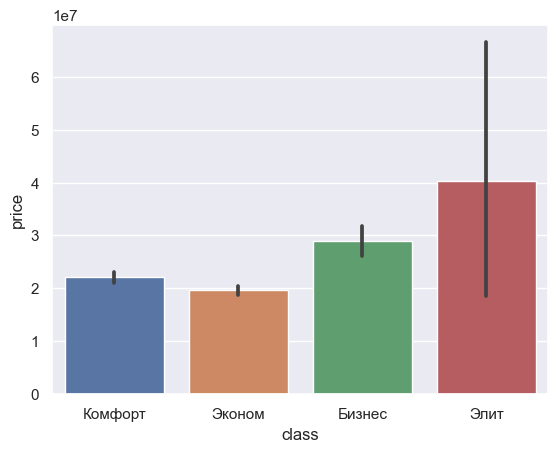

In [113]:
sns.barplot(x='class', y='price', data=all_data)


Как меняется цена в зависимости от класса мы не можем анализировать только по BI(квартиры только класса комфорт), и поэтому смотрим по всем застройщикам.
И замечаем что, квартиры класса Элит и Бизнес самые высокие

10. По очередям меняется ли цена у квартир?

In [89]:
all_data = all_data[(all_data["family_zhk"]!=all_data["residental_complex"]) & (all_data["family_zhk"]!="ADAL")]


In [90]:
all_data.groupby(["family_zhk","residental_complex"])["price"].mean()

family_zhk  residental_complex
Авиценна    Авиценна-2            3.778295e+07
Жагалау     Жагалау-2             1.842187e+07
Инфинити    Инфинити-1            2.375786e+07
            Инфинити-2            2.565694e+07
Камал       Камал-2               2.194107e+07
Коркем      Коркем-3              1.960414e+07
Кристалл    Кристалл-2            1.935190e+07
Сенатор     Сенатор-2             1.877053e+07
Статус      Статус-2              4.033333e+07
Степной     Степной-1             1.984891e+07
            Степной-2             1.919346e+07
Тулпар      Тулпар-2              2.395000e+07
Name: price, dtype: float64

In [101]:
df_2_res_com = all_data[(all_data["family_zhk"]=="Инфинити")| (all_data["family_zhk"]=="Степной")]

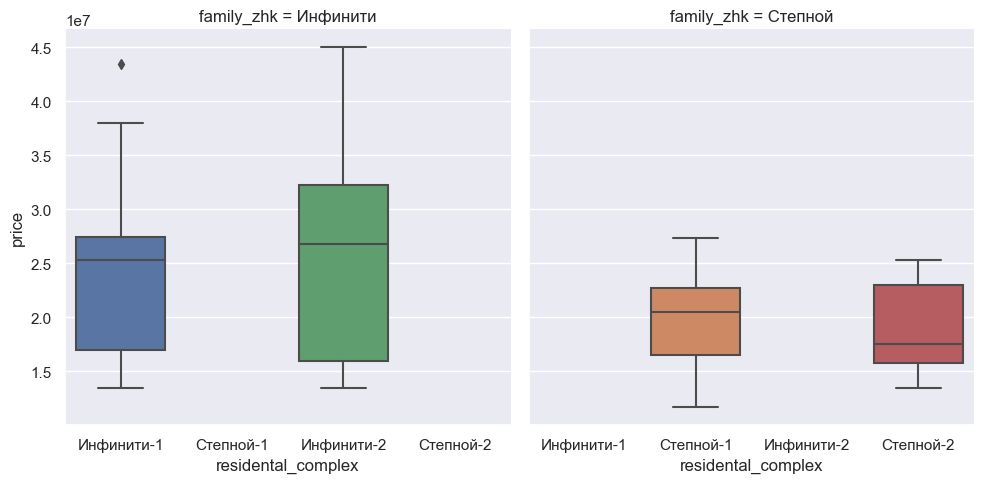

In [102]:
sns.catplot(kind = "box", y='price',x= "residental_complex",col= "family_zhk" ,data=df_2_res_com)

Ответ: Не всегда, например для ЖК Инфинити цены на Инфинити-2 выше чем на Инфинити-1, а у ЖК "Степной" наоборот